# Multivariate Gaussian sample with a given Correlation Structure
How do you generate a multivariate Gaussian sample with a given correlation structure?

In [1]:
# notebook instead of inline to do interatctive graphics 
%matplotlib notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us define the correlation matrix as

In [2]:
r_xy = .9
r_xz = .6
r_yz = .3
S = np.array([[1.0,  r_xy, r_xz],
              [r_xy,  1.0, r_yz],
              [r_xz, r_yz,  1.0]])
n = S.shape[0]
assert len(S.shape) == 2 
assert np.abs(S - S.T).max() < 1e-10
S

array([[1. , 0.9, 0.6],
       [0.9, 1. , 0.3],
       [0.6, 0.3, 1. ]])

We need to check that all the eigenvalues of the correlation matrix are positive

In [3]:
e, _, = np.linalg.eig(S)
print(f'The eigenvalues of the correlation matrix are: {sorted(e)}')
assert np.min(e) > 0

The eigenvalues of the correlation matrix are: [0.03942646699638747, 0.726646357706127, 2.233927175297484]


Create a sample of i.i.d Normals and multiply them with the Cholesky decomposition of the correaltion matrix. 

The result is sample with the given correlation structure.

In [4]:
N = 1000
Z = np.random.randn(n, N)
L = np.linalg.cholesky(S)
X = L @ Z

The key to note here is the structure of L. Each row is specifying 
the linear combination of independent $z_1, z_2, \ldots, z_n$ used to generate
correlated $x_1, x_2, \ldots, x_n$.

In [5]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.9       ,  0.43588989,  0.        ],
       [ 0.6       , -0.55059776,  0.580381  ]])

<IPython.core.display.Javascript object>


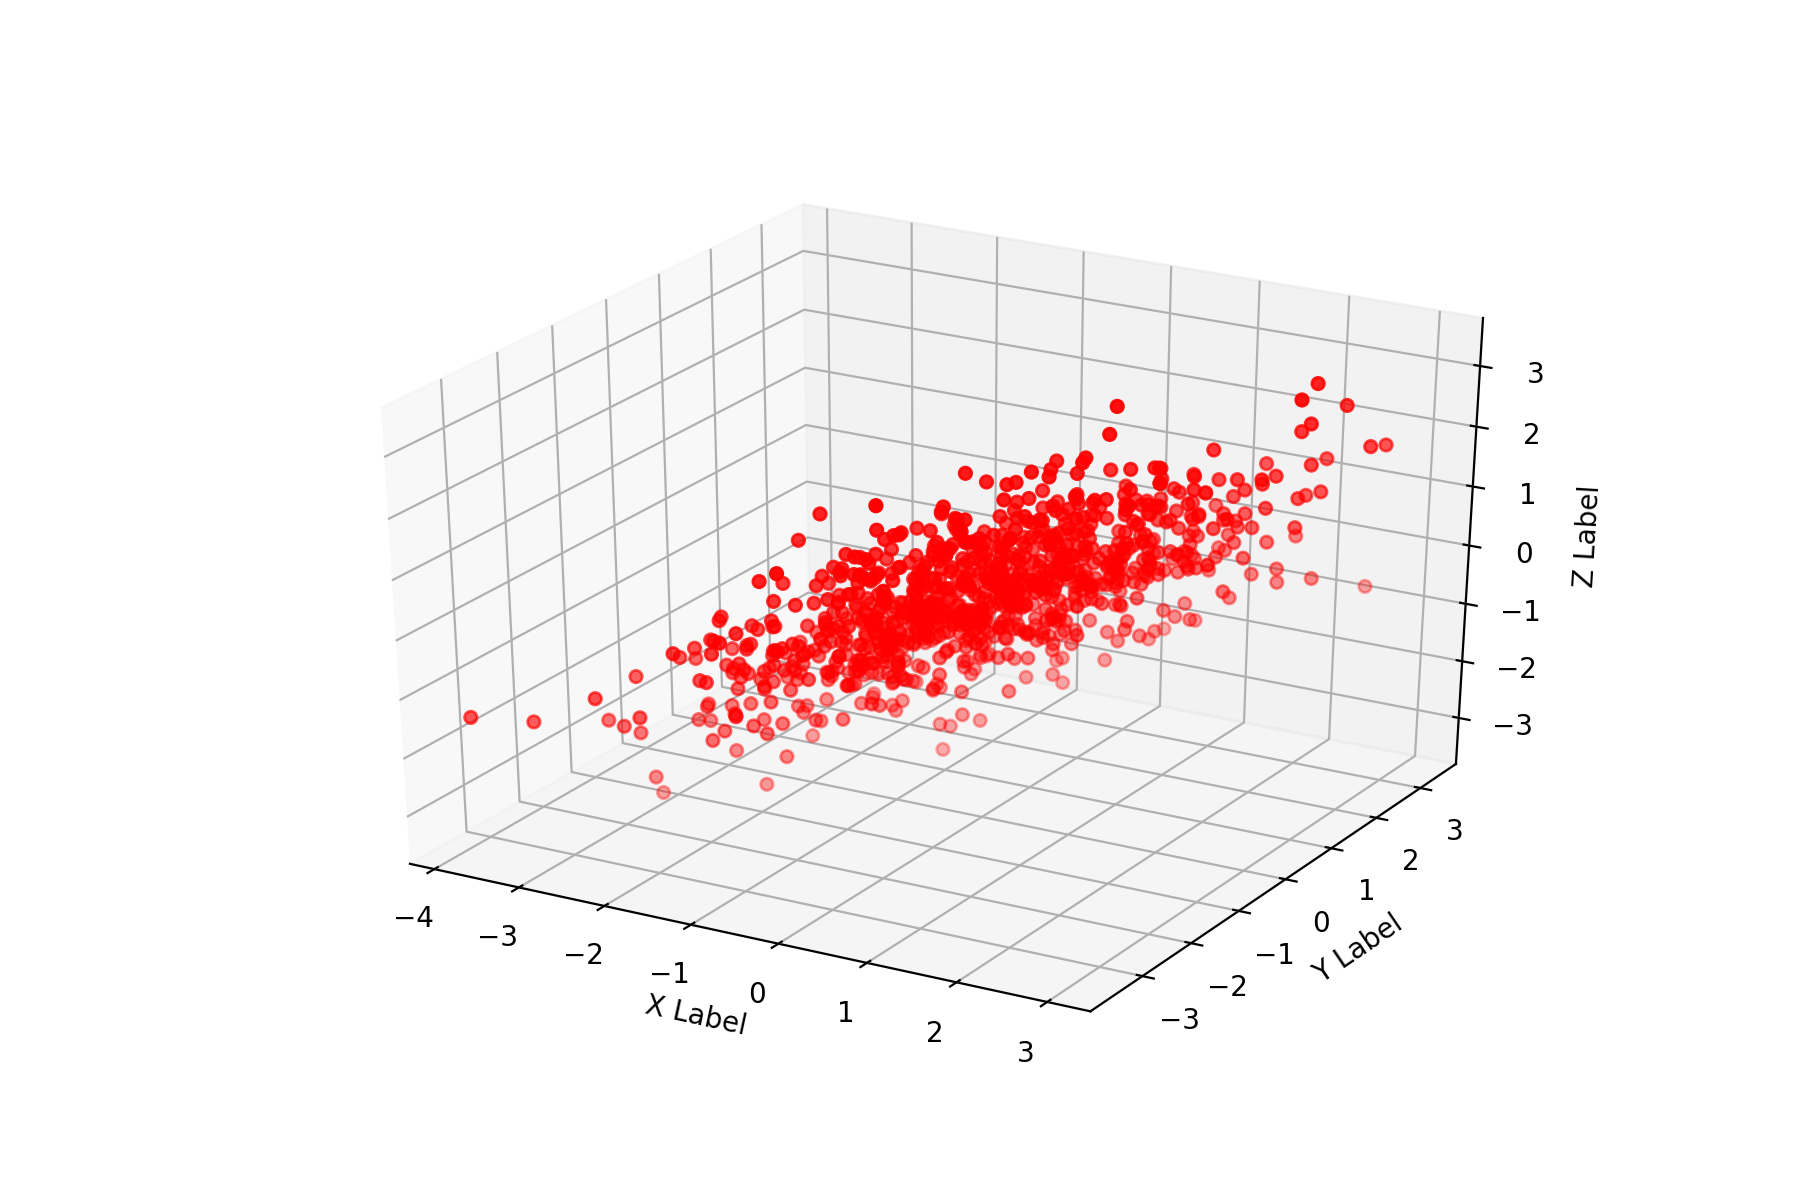

In [6]:
if X.shape[0] == 2:
    plt.figure(figsize=(9, 6))
    plt.plot(X[0, :], X[1, :], '.')
    plt.grid(True)
    plt.show()
elif X.shape[0] == 3:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0, :], X[1, :], X[2, :], c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()



### Sample Correlation

Let's check the sample correlation to see how much they match the correlatinos specified in the correlation matrix.

In [7]:
df = pd.DataFrame(X.T, columns=['x', 'y', 'z'])
df.tail()

,x,y,z
995,0.642189,0.249266,-0.328206
996,0.456913,0.379986,1.416654
997,-1.282606,-0.671302,-1.261503
998,-0.840653,-0.801799,-0.920995
999,-0.236391,0.168011,-0.048756


In [8]:
C = df.corr()
C

,x,y,z
x,1.000000,0.898343,0.612809
y,0.898343,1.000000,0.305904
z,0.612809,0.305904,1.000000


In [9]:
S

array([[1. , 0.9, 0.6],
       [0.9, 1. , 0.3],
       [0.6, 0.3, 1. ]])

In [10]:
C - S

,x,y,z
x,0.000000,-0.001657,0.012809
y,-0.001657,0.000000,0.005904
z,0.012809,0.005904,0.000000
